# Questions
* What to do with nans? - 
* Which new variables should be created?
We have such an ideas: 1. In order to making a regional comparison of Consumption rates, we can add extra financial details of the regions. Rich areas, poor areas and their consumption differences. 2. We could also make regional comparison of the consumption rates related to their residing condition; is it a residential area or it is an industrial area?
* Do we need every variable (especially with nans)?
* Which Timeframe should we use for analysis? 07/2021 - 06/2022 - reasons for it - Aras
* What is our perspective of analyzing the data? What is the interesting question?
* Tasks of Manon:
** plots of the target variable - What is the target variable? - Consumption of electrical energy
** plot of the consumption and the total production
** plot of the consumption depending on the temporality (year/month/day)
** plot of the consumption depending on the location (maybe do a map with the library Geopandas ?)
** plot of the production by type of production (pieplot ?)
** multivariate plot (correlation map)
** any other ideas to describe well the data

Energy Project
This project is part of the data analyst study by DataScientest. It is presented by Aras Ergunes and Andreas Moeller.

Available Data
The primary data source is from (Données éCO2mix régionales consolidées et définitives (janvier 2013 à mai 2022)) It can be downloaded by this link (https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature&sort=-date_heure) 

The data source describes the consumption of energy and the production of emission free energy in france. It is aggregated on a daily base for different types of energy sources and for the french regions. There are further data sources to be merged with our primary data source: * *

Provided Data
The primary data consists of several columns. They were analyzed and qualified in a spreadsheet (link).

Import Data and necessary libraries

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';')
df.head(20)

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Île-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,44,Grand Est,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data analysis
Display the data type information of the variables
Show number of null entries for the variables
View the statistical values for the variables

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980288 entries, 0 to 1980287
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  Stockage batterie    float64
 16  Déstockage batterie  float64
 17  Eolien terrestre     float64
 18  Eolien offshore      float64
 19  TCO Thermique (%)    float64
 20  TCH Thermique (%)    float64
 21  TCO Nucléaire (%)    float64
 22  TCH Nucléaire (%)    float64
 23  TCO Eolien (%)       float64
 24

In [3]:
df.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          825127
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            860167
Bioénergies (MW)            12
Ech. physiques (MW)     136908
Stockage batterie      1700928
Déstockage batterie    1736064
Eolien terrestre       1736064
Eolien offshore        1837824
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCH Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCH Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
TCH Bioénergies (%)    1716480
Column 30              1980288
dtype: i

In [4]:
df.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
count,1.980288e+06,1.980276e+06,1.980276e+06,1.155161e+06,1.980180e+06,1.980276e+06,1.980276e+06,1.120121e+06,1.980276e+06,1.843380e+06,...,398112.000000,508032.000000,508032.000000,508032.000000,508032.000000,263808.000000,263808.000000,263808.000000,263808.000000,0.0
mean,4.991667e+01,4.497690e+03,3.783493e+02,6.232625e+03,2.564869e+02,9.196955e+01,6.001617e+02,-1.161740e+02,8.332810e+01,-4.633691e+02,...,31.110610,9.922807,27.050076,2.799379,33.714231,11.723816,27.980819,2.343480,53.879981,NaN
std,2.564001e+01,2.170361e+03,5.407519e+02,3.043245e+03,4.333763e+02,2.247761e+02,1.028933e+03,3.134738e+02,4.462511e+01,4.209660e+03,...,30.566573,13.727964,20.906299,5.318540,26.536978,17.097511,27.480661,0.874629,12.776024,NaN
min,1.100000e+01,7.200000e+02,-8.300000e+01,-1.440000e+02,-6.000000e+00,-2.300000e+01,-6.000000e+00,-2.581000e+03,4.000000e+00,-1.221900e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630000,13.990000,NaN
25%,2.775000e+01,2.789000e+03,2.400000e+01,3.598000e+03,2.700000e+01,0.000000e+00,5.000000e+00,-1.600000e+01,4.800000e+01,-3.802000e+03,...,0.000000,0.360000,9.140000,0.030000,0.170000,0.120000,12.180000,1.740000,45.450000,NaN
50%,4.800000e+01,4.111000e+03,1.560000e+02,6.214000e+03,1.050000e+02,1.000000e+00,5.700000e+01,0.000000e+00,7.400000e+01,8.800000e+01,...,27.040000,3.980000,23.320000,1.680000,39.940000,1.980000,25.100000,2.150000,53.690000,NaN
75%,7.525000e+01,5.741000e+03,4.910000e+02,8.722000e+03,2.990000e+02,6.700000e+01,8.790000e+02,0.000000e+00,1.160000e+02,2.141000e+03,...,54.880000,14.460000,41.870000,2.630000,57.500000,18.370000,42.100000,2.740000,63.980000,NaN
max,9.300000e+01,1.533800e+04,4.293000e+03,1.363200e+04,4.900000e+03,2.894000e+03,8.742000e+03,0.000000e+00,5.480000e+02,1.395900e+04,...,102.010000,103.560000,117.980000,80.180000,112.430000,115.960000,2550.000000,9.690000,243.560000,NaN


More Key Values
Calculate variable categorisation
Completeness of the variable values in percent
Distribution of categorical variables

In [5]:
def get_values(columns):
    for column in columns:
        # Percentage of missing values
        percentage = (df[column].isna().sum() * 100) / len(df)
        # Categorical / Quantitative 
        no_categories = len(df[column].unique())
        if no_categories <= 12:
            cat_class = 'Categorical - up to 12 categories'
        else:
            cat_class = 'Quantitative'
            
        print('--Variable: ', column,'--')
    
        print(cat_class)
        print('Percentage of missing values ', round(percentage, 2).astype(str), '%')        

        if no_categories <= 12:
            print('Distribution: ', df[column].unique())
        
get_values(df.columns)
            

--Variable:  Code INSEE région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  [28 27 53 11 32 75 84 52 24 44 76 93]
--Variable:  Région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Normandie' 'Bourgogne-Franche-Comté' 'Bretagne' 'Île-de-France'
 'Hauts-de-France' 'Nouvelle-Aquitaine' 'Auvergne-Rhône-Alpes'
 'Pays de la Loire' 'Centre-Val de Loire' 'Grand Est' 'Occitanie'
 "Provence-Alpes-Côte d'Azur"]
--Variable:  Nature --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Données définitives' 'Données consolidées']
--Variable:  Date --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Heure --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Date - Heure --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Consommation (MW) --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Thermique (MW) --
Quantitative
Percentag

Cut the time frame
Convert "Date - Heure" column to datetime
Copy data from July 2021 to June 2022 into a df_project dataframe

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.to_datetime("2021-07-01")
end_date = pd.to_datetime("2022-06-30")
df_project = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df_project.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
1787328,53,Bretagne,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,2479.0,6.0,NaN,7.0,...,0.0,0.16,1.45,2.10,66.67,NaN,NaN,NaN,NaN,NaN
1787329,27,Bourgogne-Franche-Comté,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,1987.0,24.0,NaN,70.0,...,0.0,4.68,17.78,2.57,65.38,NaN,NaN,NaN,NaN,NaN
1787330,11,Île-de-France,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,6381.0,0.0,NaN,0.0,...,0.0,0.14,45.00,2.49,49.69,NaN,NaN,NaN,NaN,NaN
1787331,28,Normandie,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,2816.0,195.0,7509.0,17.0,...,0.0,0.43,40.00,2.88,55.48,NaN,NaN,NaN,NaN,NaN
1787332,93,Provence-Alpes-Côte d'Azur,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,4252.0,358.0,NaN,37.0,...,0.0,23.31,30.28,1.74,24.50,NaN,NaN,NaN,NaN,NaN


In [7]:
# Adding the "Total Production" column
df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']

# Adding the "Green Production" column
df_project.loc[:, 'Green Production'] = df_project.loc[:, 'Total Production'] - df_project.loc[:, 'Nucléaire (MW)']

df_project.info()

C:\Users\arask\AppData\Local\Temp\ipykernel_16600\890329556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']
C:\Users\arask\AppData\Local\Temp\ipykernel_16600\890329556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192960 entries, 1787328 to 1980287
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Code INSEE région    192960 non-null  int64         
 1   Région               192960 non-null  object        
 2   Nature               192960 non-null  object        
 3   Date                 192960 non-null  datetime64[ns]
 4   Heure                192960 non-null  object        
 5   Date - Heure         192960 non-null  object        
 6   Consommation (MW)    192960 non-null  float64       
 7   Thermique (MW)       192960 non-null  float64       
 8   Nucléaire (MW)       112560 non-null  float64       
 9   Eolien (MW)          192960 non-null  float64       
 10  Solaire (MW)         192960 non-null  float64       
 11  Hydraulique (MW)     192960 non-null  float64       
 12  Pompage (MW)         112560 non-null  float64       
 13  Bioéner

Examine the remaining null values

In [8]:
df_project.isna().sum()

Code INSEE région           0
Région                      0
Nature                      0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)          80400
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)            80400
Bioénergies (MW)            0
Ech. physiques (MW)     93456
Stockage batterie       17856
Déstockage batterie     52992
Eolien terrestre        52992
Eolien offshore        111312
TCO Thermique (%)           0
TCH Thermique (%)           0
TCO Nucléaire (%)       22080
TCH Nucléaire (%)       22080
TCO Eolien (%)              0
TCH Eolien (%)              0
TCO Solaire (%)             0
TCH Solaire (%)             0
TCO Hydraulique (%)    139968
TCH Hydraulique (%)    139968
TCO Bioénergies (%)    139968
TCH Bioénergies (%)    139968
Column 30              192960
Total Production       140352
Green Prod

Examine the remaining null values

In [9]:
# What to do with nans?
df.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          825127
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            860167
Bioénergies (MW)            12
Ech. physiques (MW)     136908
Stockage batterie      1700928
Déstockage batterie    1736064
Eolien terrestre       1736064
Eolien offshore        1837824
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCH Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCH Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
TCH Bioénergies (%)    1716480
Column 30              1980288
dtype: i

Examine the null values at Nucléaire (MW)

In [10]:
# regions_nuc - regions where we have null values for nuclear energy
regions_nuc = df_project.loc[df['Nucléaire (MW)'].isna()]['Région'].unique()
# proof if there are any valid values for nuclear energy in these regions
df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_nuc.any()], axis=1)) & (df['Nucléaire (MW)'].notnull())]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,Total Production,Green Production


Examine the null values at Pompage (MW)

In [11]:
# regions_pmp - regions where we have null values for pumping energy
regions_pmp = df_project.loc[df['Pompage (MW)'].isna()]['Région'].unique()
# proof if there are any valid values for pumping energy in these regions
df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_pmp.any()], axis=1)) & (df['Pompage (MW)'].notnull())]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,Total Production,Green Production


Examine the null values at Ech. physiques (MW)

In [12]:
# regions_eph - regions where we have null values for eph energy
regions_eph = df_project.loc[df_project['Ech. physiques (MW)'].isna()]['Région'].unique()
#print(regions_eph)
# proof if there are any valid values for eph energy in these regions
#df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_eph.any()], axis=1)) & (df['Ech. physiques (MW)'].notnull())]
#df_eph = df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_eph.any()], axis=1)) & (df['Ech. physiques (MW)'].notnull())]
#regions_eph = ['Bourgogne-Franche-Comté', 'Île-de-France', "Provence-Alpes-Côte d'Azur", 'Pays de la Loire', 'Grand Est', 'Auvergne-Rhône-Alpes', 'Hauts-de-France', 'Nouvelle-Aquitaine', 'Occitanie', 'Centre-Val de Loire', 'Normandie']
#df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_eph], axis=1)) & (df['Ech. physiques (MW)'].notnull())]
# Find out to which regions these found values belong
#print(df_eph['Région'], df_eph['Ech. physiques (MW)'])
#print(df_eph.loc[df_eph['Ech. physiques (MW)'].isna()])#['Ech. physiques (MW)']

Searching for regional gaps in the data
We still achieve null values in three important columns:

Nucléaire (MW)
Pompage (MW)
Ech. physiques (MW)
We realise that these sort of power plants are not available in each region. For Nucléaire (MW) and Pompage (MW) null values only appear in these identified regions. For further investigations they will be replaced by 0.

In [13]:
df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'] = df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'].fillna(0)
df_project.loc[df_project['Région'].isin(regions_pmp), 'Pompage (MW)'] = df_project.loc[df_project['Région'].isin(regions_pmp), 'Pompage (MW)'].fillna(0)
df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'] = df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'].fillna(0)

C:\Users\arask\AppData\Local\Temp\ipykernel_16600\3259086243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'] = df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'].fillna(0)


Add additional variables
Total production
Total green production

Variables with too many null values
We came to the conclusion that some variables have too many null values

We can't find a valid approach to replace the missing values
It's possible to use the data frame for further investigations without these variables

- cut the time frame
- add extra variables
- total production
- total green production
- delete variables with too many nans
- handle nans in the resulting variables

- statistical investigation
- graphical display
- decide what is our target variable (comnsumption)
- decide which variables are important
- add useful variables from other dataframes
- meteorogical data (link)
- geographical data
- population data
- ML techniques

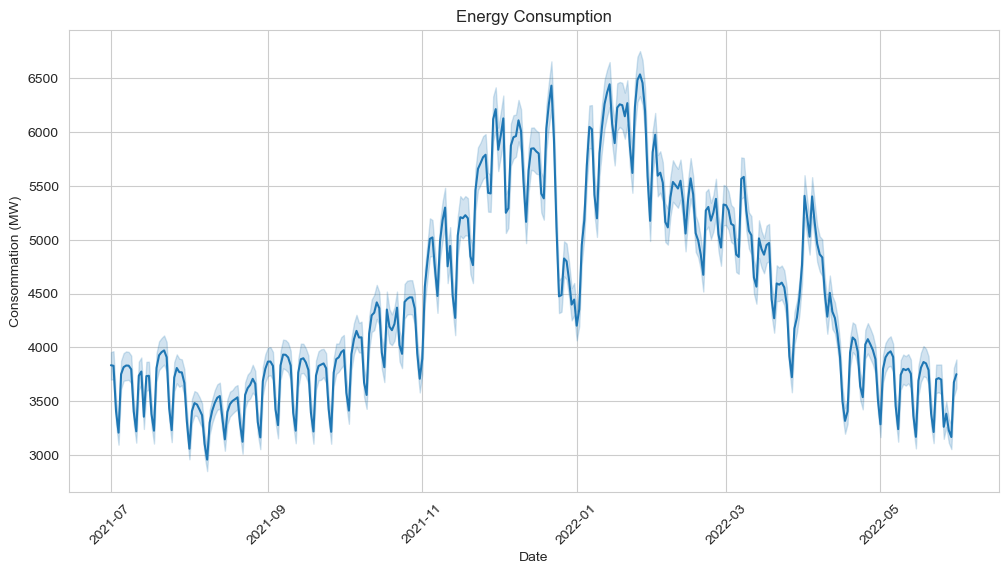

In [14]:
# Plotting the Consommation (MW)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Consommation (MW)", data=df_project)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()

C:\Users\arask\AppData\Local\Temp\ipykernel_16600\2057372354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Date - Heure'] = pd.to_datetime(df_project['Date - Heure'], utc=True)
C:\Users\arask\AppData\Local\Temp\ipykernel_16600\2057372354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Year'] = df_project['Date - Heure'].dt.year
C:\Users\arask\AppData\Local\Temp\ipykernel_16600\2057372354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

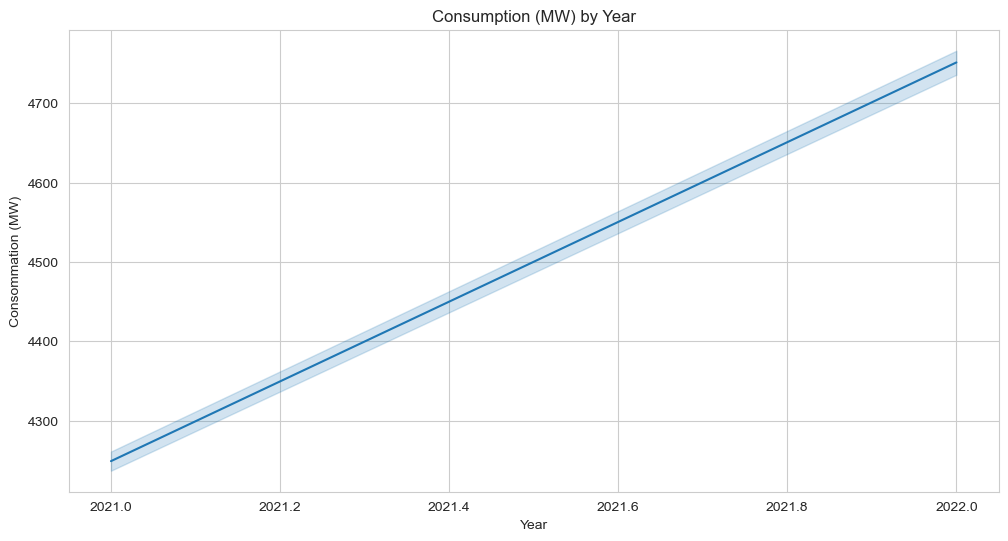

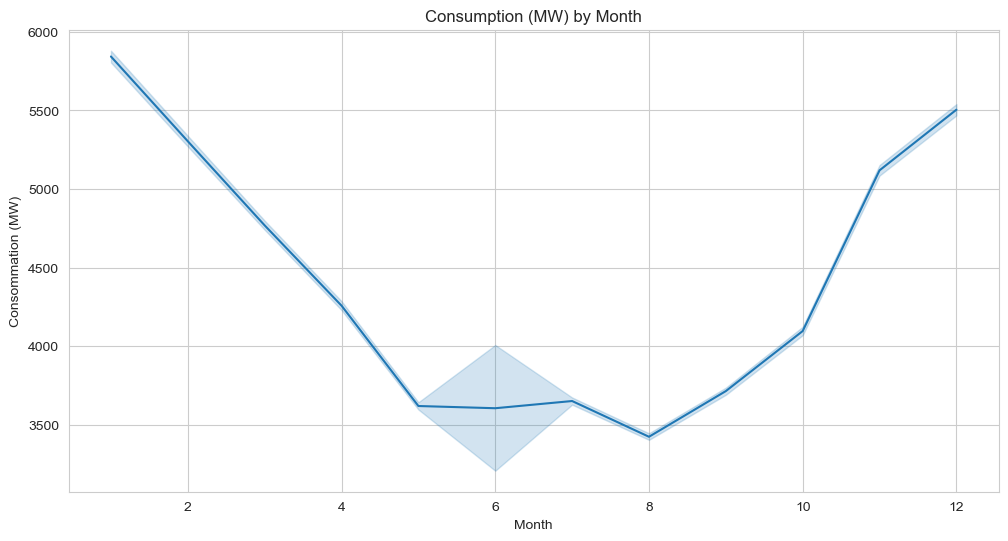

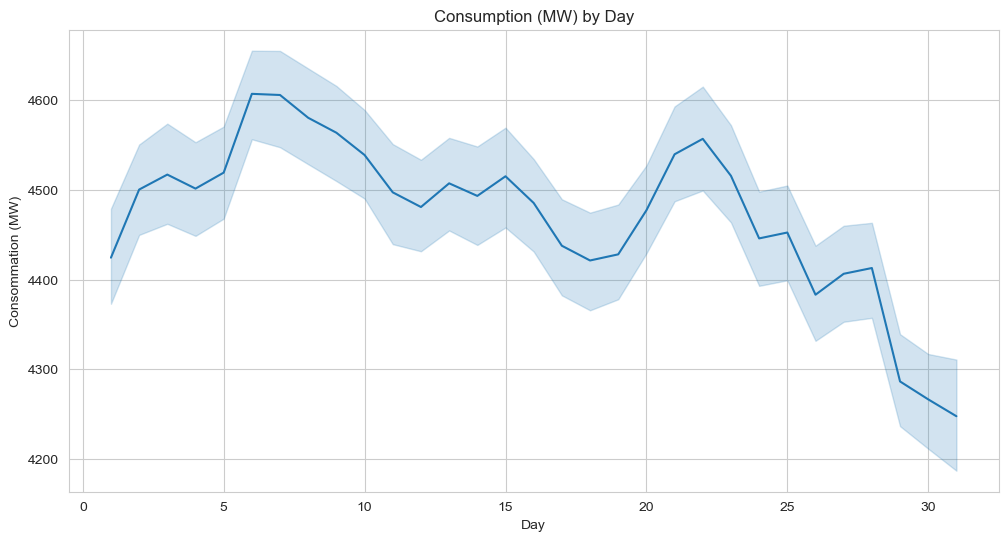

In [15]:
# Convert "Date - Heure" column to datetime with timezone
df_project['Date - Heure'] = pd.to_datetime(df_project['Date - Heure'], utc=True)

# Create year, month, and day variables from the "Date - Heure"
df_project['Year'] = df_project['Date - Heure'].dt.year
df_project['Month'] = df_project['Date - Heure'].dt.month
df_project['Day'] = df_project['Date - Heure'].dt.day

# 'Consommation (MW)' based on year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Year', y='Consommation (MW)')
plt.title('Consumption (MW) by Year')
plt.xlabel('Year')
plt.ylabel('Consommation (MW)')
plt.show()

# 'Consommation (MW)' based on month
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Month', y='Consommation (MW)')
plt.title('Consumption (MW) by Month')
plt.xlabel('Month')
plt.ylabel('Consommation (MW)')
plt.show()

# 'Consommation (MW)' based on day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Day', y='Consommation (MW)')
plt.title('Consumption (MW) by Day')
plt.xlabel('Day')
plt.ylabel('Consommation (MW)')
plt.show()


In [ ]:
# Plotting the Consommation (MW) vs Total Production
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Total Production", y="Consommation (MW)", data = df_project)
plt.title("Consommation (MW) vs Total Production")
plt.xlabel("Total Production")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()

# Plotting the Green Production vs Total Production
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.regplot(x="Total Production", y="Green Production", data = df_project)
plt.title("Green Production vs Total Production")
plt.xlabel("Total Production")
plt.ylabel("Green Production")
plt.xticks(rotation=45)
plt.show()

# Plotting the Consommation (MW) vs Green Production

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.regplot(x="Total Production", y="Green Production", data = df_project)
plt.title("Consommation (MW) vs Green Production")
plt.xlabel("Green Production")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()


C:\Users\arask\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
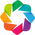

In [16]:
#first install geoviews packages from terminal than import 
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

gv.extension('bokeh', 'matplotlib')


In [17]:
#import geopandas and open france region geojson file which has a same code numbers with main df. it also has geometric data of the regions.
import geopandas as gpd
df_project_geo = gpd.read_file('regions-version-simplifiee.geojson')
df_project_geo.head()
df_project_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   code      13 non-null     object  
 1   nom       13 non-null     object  
 2   geometry  13 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 444.0+ bytes


In [18]:
#making an array with all french regions. from 1 to 10
import numpy as np
df_project_geo['value'] = np.random.randint(1, 10, df_project_geo.shape[0])

deps = gv.Polygons(df_project_geo, vdims=['nom','value'])


In [19]:
#visualize the regions with a colour pallet
from geoviews import dim
deps.opts(width=600, height=600, toolbar='above', color=dim('value'),
          colorbar=True, tools=['hover'], aspect='equal')

:Polygons   [Longitude,Latitude]   (nom,value)

In [20]:
#this is a df from kaggle. which contains population data of France and it has a same region codes (as a column) with our main dataframe. we can merge this with our current df.
import pandas as pd
df_project_pop = pd.read_csv('population_france_departements_2019.tsv', sep='\t', thousands=',')
df_project_pop.head(40)

,"Estimation de population au 1er janvier, par département, sexe et grande classe d'âge",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Année 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Départements,NaN,Ensemble,NaN,NaN,NaN,NaN,NaN,Hommes,NaN,NaN,NaN,NaN,NaN,Femmes,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total
4,01,Ain,"167,720","150,949","179,476","102,788","52,755","653,688","86,359","75,242","89,278","49,523","21,526","321,928","81,361","75,707","90,198","53,265","31,229","331,760"
5,02,Aisne,"131,435","115,046","137,405","96,000","48,130","528,016","67,391","57,430","68,197","45,907","18,308","257,233","64,044","57,616","69,208","50,093","29,822","270,783"
6,03,Allier,"67,628","61,986","87,232","71,910","44,309","333,065","34,894","31,397","42,594","33,582","16,973","159,440","32,734","30,589","44,638","38,328","27,336","173,625"
7,04,Alpes-de-Haute-Provence,"33,883","30,028","43,039","34,523","20,507","161,980","17,721","15,097","20,941","16,884","8,510","79,153","16,162","14,931","22,098","17,639","11,997","82,827"
8,05,Hautes-Alpes,"30,518","28,633","37,887","28,356","16,390","141,784","15,987","14,362","18,843","13,704","6,592","69,488","14,531","14,271","19,044","14,652","9,798","72,296"
9,06,Alpes-Maritimes,"228,072","237,427","282,270","196,934","136,196","1,080,899","116,648","115,805","136,161","89,473","52,474","510,561","111,424","121,622","146,109","107,461","83,722","570,338"


In [ ]:
#converting code column from object to integer then merge it with our main df
df_project_geo['code'] = df_project_geo['code'].astype('int64')
jf = df_project_geo.merge(df_project, left_on='code', right_on='Code INSEE région', suffixes=('', '_y'))
jf.head(10)

In [ ]:
jf.info()

In [ ]:
#still waiting. a consommation (mw) map of france. did not get any error but it is still processing!
regions = gv.Polygons(jf, vdims=['nom', 'Consommation (MW)'])
regions.opts(width=600, height=600, toolbar='above', color=dim('Consommation (MW)')/1e6, 
             colorbar=True, tools=['hover'], aspect='equal')

# Step 2 of DataVizualization :
plot of Consumption VS total production/green total production
map with GeoPandas
correlation matrix
pieplot of the total production by kind of production
# Step 3 of Preprocessing :
deal with the NA values : delete columns with more than 75% of NA
do variable selection : create a dataframe with only the variables you want to use for the prediction ie the useful variables (depending on you, depending on the correlation and depending on the NA). For example, you can remove nature (not useful), code (not useful), TCO variables (too many NA values) etc. If you keep all the productions variables, you can also remove "total production" and "total green production" to escape redundancy of information
add useful variables from other dataframes (meteo for instance)
The goal is to obtain a dataframe clean and ready for the Modelling, with only the variables that you will use for the prediction of the consumption.